#**Loading Data**

In [11]:
import pandas as pd
import numpy as np
import json
import random
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer 
from collections import Counter 

In [12]:
def getData():
    with open ('/content/drive/MyDrive/CGAS/archive/train.json', encoding="utf8") as f:
        recipedata = json.load(f)
    data = pd.DataFrame(recipedata)
    return data

In [13]:
def preprocessing(data):
    lemmatizer = WordNetLemmatizer()
    for i in range(len(data)):
        data['ingredients'][i]=[x.lower() for x in data['ingredients'][i]]
        data['ingredients'][i]=[lemmatizer.lemmatize(x) for x in data['ingredients'][i]]
    return data

# **Answer to Q1**

Using the below copy-mutate algorithm we make the functions required for this question: <br>
1. Start with Epoch =0 and Number of Recipes Per Epochs = Round (Number of
recipes/Number of Epochs)
2. Initiate the primordial cuisine (t = 0), Nature Basket and the Kitchen Basket:
- Size of recipes = (say) 10
- Number of recipes at t = 0, NR
t=0 = 500

- Size of Kitchen Basket = 50
- NR
t=0 ≫ Size of KB

3. Pick a random recipe from the primordial kitchen for the ‘modification’.
4. Pick an ingredient randomly from the chosen recipe & one from KB compare the
ingredients.
5. If the KB ingredient is not the same as recipe ingredient replace the latter with the
former.
6. Repeat Steps 4—5 until the Recipe gets modified.
7. Add the new ‘modified/mutated’ recipe to the Kitchen Basket if the same isn’t there
already.
8. Repeat 3—7 until the number of recipes reaches the desired number of the next Epoch.
9. Analyze the cuisine for the recipe size as well as the frequency-rank statistics the end of
each Epoch.

Preparing the functions required for the copy mutate algorithm in Question 1.

In [14]:
def create_nature_basket(data):
    lemmatizer = WordNetLemmatizer()
    nb = []
    for i in data['ingredients']:
        for j in i:
            j = j.lower()
            j = lemmatizer.lemmatize(j)
            if j not in nb:
                  nb.append(j)
    print('Size of Nature Basket = ', len(set(nb)))
    return nb

In [15]:
def get_fitness_value(nb):
    fvalue = {}
    for i in nb:
        fvalue[i] = random.uniform(0,1)
    return fvalue

In [16]:
def get_data_info(data):
    print('Number of Recipes = ', len(data))
    print('Number of Ingredients = ',len(nb))
    print('Ratio of Number of Ingredients to Number of Recipes = ', len(nb)/len(data))
    return

In [17]:
def create_initial_primordial_cuisine(nb,recipesize):
    prim = []
    kb = random.sample(nb,k=50)
    for i in kb:
        nb.remove(i)
    print('Size of Kitchen Basket = ', len(set(kb)))
    while(len(prim)<500):
        cuis = set(random.sample(kb,recipesize))
        if cuis not in prim:
            prim.append(cuis)
    print('Primoridal cuisine of size ' + str(len(prim)) + ' has been created' )
    return prim,kb,nb

In [28]:
def apply_copy_mutate_algo(prim,kb,epochs,total_size,nb,fvalue,choose):

    rec_per_epoch = round(total_size/epochs)
    print('Recipes generated per epoch = ', rec_per_epoch)

    phi = (len(nb)+len(kb))/total_size
    allone_epoch = {}
    for i in range(1,epochs+1):
        print('ratio = ' + str(len(kb)/len(prim)))
        while len(prim)<rec_per_epoch*i:       
            delta = len(kb)/len(prim)            
            if(delta>=phi):
                old_rec = list(random.choice(prim))
                prev_len = len(prim)
                while prev_len == len(prim):
                    rem = random.choice(old_rec)
                    new = random.choice(kb)
                    if fvalue[new] > fvalue[rem] and new not in old_rec:
                        old_rec.remove(rem)
                        old_rec.append(new)
                    if set(old_rec) not in prim:
                        prim.append(set(old_rec))
            else:
                    ni = random.choice(nb)
                    kb.append(ni)
                    nb.remove(ni)

        print('Length of Kitchen Basket (KB) = ' + str(len(kb)) + ' after epoch ' + str(i))
        print('Length of Primordial Cuisine = ' + str(len(prim)) + ' after epoch ' + str(i))
        if choose == 'all':
          get_frequency_rank_plot(prim,i,'all')
          #plt.show()
          get_recipe_size_distribution(prim,i,'all')
          #plt.show()
          print("________________________________________________________________________________")
        elif choose == 'one':
          allone_epoch[i] = prim

    return prim,allone_epoch

In [19]:
def get_frequency_rank_plot(prim,epoch,choose):
    all_ings = []

    for i in range(len(prim)):
          all_ings += prim[i]

    count_word = Counter(all_ings)
    print('Feature-Length: ' , len(count_word)) 
    total_ingredients = len(all_ings)
    sorted_ings = count_word.most_common(total_ingredients)
    vocab_to_int={i+1:c/sorted_ings[0][1] for i,(w,c) in enumerate(sorted_ings)}
    keys = []
    for kk in vocab_to_int.keys():
      keys.append(kk)
    key_value = []
    for kv in vocab_to_int.values():
      key_value.append(kv)
    #keys = vocab_to_int.keys()
    plt.loglog(np.array(keys),np.array(key_value),label = str(epoch))
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    
    if choose == 'all':
        plt.title('Frequency-Rank distribution for epoch ' + str(epoch))
        plt.grid()
        plt.show()

    # elif choose == 'one':
    #     plt.title('Frequency-Rank distribution for all epochs ')
    #     #plt.grid()
    #     plt.legend()
    #     plt.show()

    return

In [20]:
def get_frequency_rank_for_one(prim,epoch):
    all_ings = []

    for i in range(len(prim)):
          all_ings += prim[i]

    count_word = Counter(all_ings)
    #print('Feature-Length: ' , len(count_word)) 
    total_ingredients = len(all_ings)
    sorted_ings = count_word.most_common(total_ingredients)
    vocab_to_int={i+1:c/sorted_ings[0][1] for i,(w,c) in enumerate(sorted_ings)}
    keys = []
    for kk in vocab_to_int.keys():
      keys.append(kk)
    key_value = []
    for kv in vocab_to_int.values():
      key_value.append(kv)
    # #keys = vocab_to_int.keys()
    # plt.loglog(np.array(keys),np.array(key_value),label = str(epoch))
    # plt.xlabel('Rank')
    # plt.ylabel('Frequency')
    # plt.legend()
    # plt.show()
    epoch_len = [epoch] * len(keys)
    epoch_data = pd.DataFrame()
    epoch_data['epochs'] = epoch_len
    epoch_data['keys'] = np.array(keys)
    epoch_data['values'] = np.array(key_value)

    return epoch_data

In [21]:
def get_recipe_size_distribution(prim,epoch,choose):
    ingrlen = {}
    for i in list(prim):
        if len(i) in ingrlen.keys():
                ingrlen[len(i)] = ingrlen[len(i)]+(100/len(prim))
        else:
            ingrlen[len(i)]=100/(len(prim))
    lists = sorted(ingrlen.items())             #returns a list of tuples sorted by key
    x, y = zip(*lists)                          #unpacks a list of pairs into two tuples
    plt.plot(x, y,marker='o',label = str(epoch))
    plt. xlabel('Recipe size')
    plt.title('Recipe size distribution for ' + str(epoch))
    plt.ylabel('Percentage')
    
    if choose == 'all':
        plt.title('Recipe size distribution for ' + str(epoch))
        plt.grid()  
        plt.show()

    # elif choose == 'one':
    #     plt.title('Recipe size distribution for all epochs ')
    #     #plt.grid()
    #     plt.legend()
    #     plt.show()

    return

In [22]:
def get_recipe_size_distribution_one(prim,epoch):
    ingrlen = {}
    for i in list(prim):
        if len(i) in ingrlen.keys():
                ingrlen[len(i)] = ingrlen[len(i)]+(100/len(prim))
        else:
            ingrlen[len(i)]=100/(len(prim))
    lists = sorted(ingrlen.items())             #returns a list of tuples sorted by key
    x, y = zip(*lists)                          #unpacks a list of pairs into two tuples
    # plt.plot(x, y,marker='o',label = str(epoch))
    # plt. xlabel('Recipe size')
    # plt.title('Recipe size distribution for ' + str(epoch))
    # plt.ylabel('Percentage')
    # plt.legend()
    # plt.show()

    epoch_rc_len = [epoch] * len(x)
    epoch_rc_data = pd.DataFrame()
    epoch_rc_data['epochs'] = epoch_rc_len
    epoch_rc_data['keys'] = np.array(x)
    epoch_rc_data['values'] = np.array(y)

    return epoch_rc_data

Utilising the functions as shown below:

In [23]:
data = getData()
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [25]:
nb = create_nature_basket(data)
fvalue = get_fitness_value(nb)

Size of Nature Basket =  6703


In [26]:
#Information regarding the given recipe data
get_data_info(data)

Number of Recipes =  39774
Number of Ingredients =  6703
Ratio of Number of Ingredients to Number of Recipes =  0.16852717855885754


Size of Kitchen Basket =  50
Primoridal cuisine of size 500 has been created
Feature-Length:  50


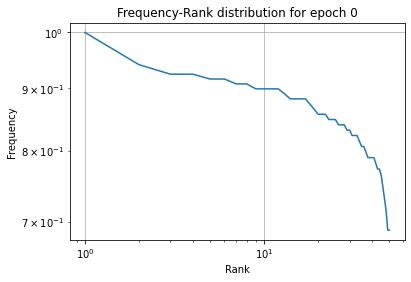

Recipes generated per epoch =  5682
ratio = 0.1
Length of Kitchen Basket (KB) = 616 after epoch 1
Length of Primordial Cuisine = 5682 after epoch 1
Feature-Length:  500


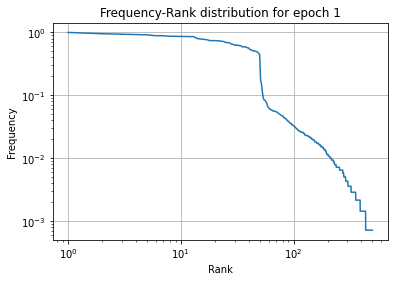

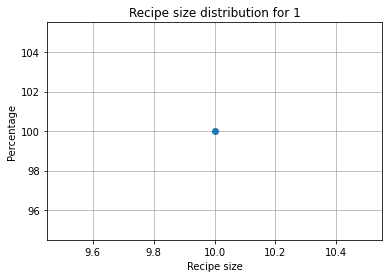

________________________________________________________________________________
ratio = 0.10841253079901443
Length of Kitchen Basket (KB) = 1231 after epoch 2
Length of Primordial Cuisine = 11364 after epoch 2
Feature-Length:  993


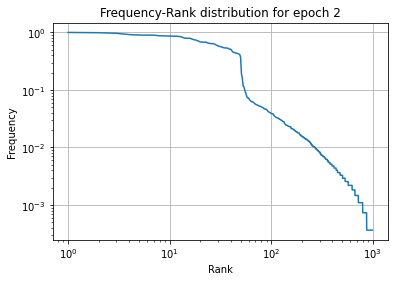

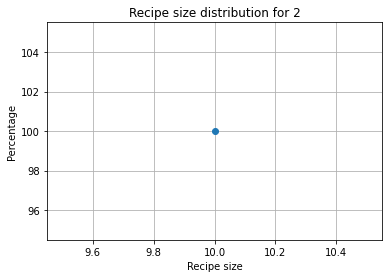

________________________________________________________________________________
ratio = 0.10832453361492432
Length of Kitchen Basket (KB) = 1847 after epoch 3
Length of Primordial Cuisine = 17046 after epoch 3
Feature-Length:  1502


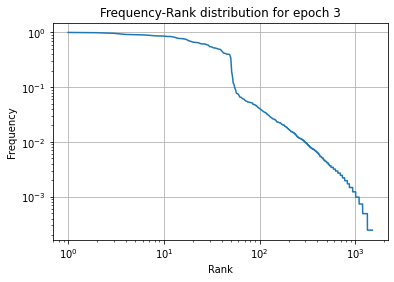

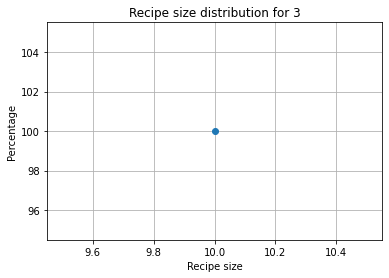

________________________________________________________________________________
ratio = 0.10835386600962102
Length of Kitchen Basket (KB) = 2462 after epoch 4
Length of Primordial Cuisine = 22728 after epoch 4
Feature-Length:  1984


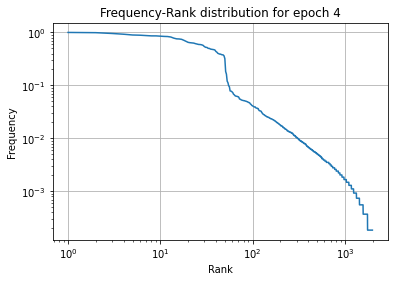

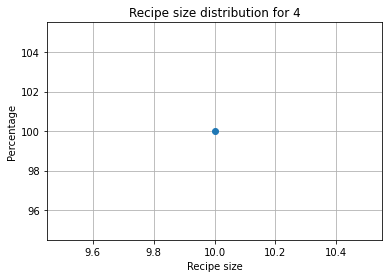

________________________________________________________________________________
ratio = 0.10832453361492432
Length of Kitchen Basket (KB) = 3078 after epoch 5
Length of Primordial Cuisine = 28410 after epoch 5
Feature-Length:  2464


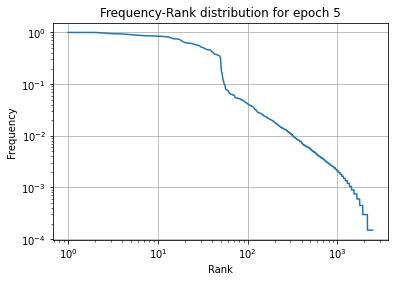

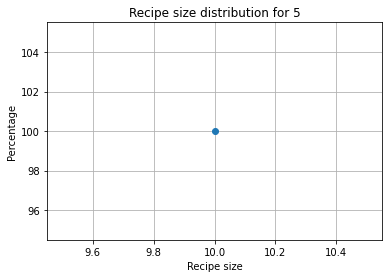

________________________________________________________________________________
ratio = 0.10834213305174234
Length of Kitchen Basket (KB) = 3693 after epoch 6
Length of Primordial Cuisine = 34092 after epoch 6
Feature-Length:  2924


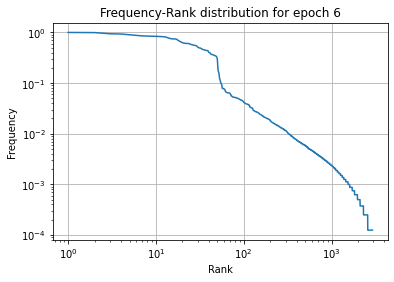

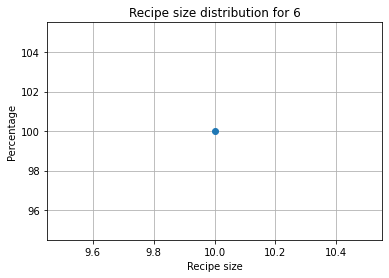

________________________________________________________________________________
ratio = 0.10832453361492432
Length of Kitchen Basket (KB) = 4308 after epoch 7
Length of Primordial Cuisine = 39774 after epoch 7
Feature-Length:  3407


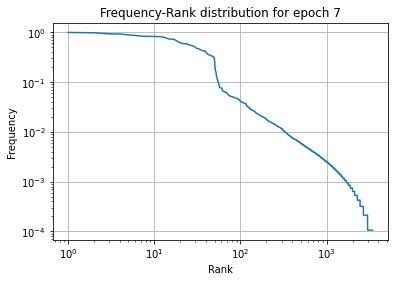

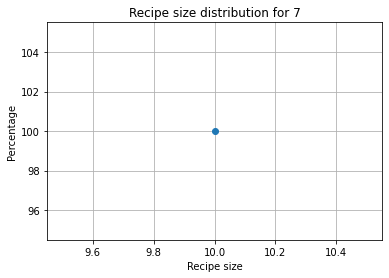

________________________________________________________________________________


In [29]:
rec_size = 10
prim,kb,nb = create_initial_primordial_cuisine(nb,rec_size)
get_frequency_rank_plot(prim,0,'all')
plt.show()
epochs = 7
prim, all_epochs_dict = apply_copy_mutate_algo(prim,kb,epochs,39774,nb,fvalue,'all')

Let us check for all epochs together

Size of Nature Basket =  6703
Size of Kitchen Basket =  50
Primoridal cuisine of size 500 has been created
Recipes generated per epoch =  5682
ratio = 0.1
Length of Kitchen Basket (KB) = 958 after epoch 1
Length of Primordial Cuisine = 5682 after epoch 1
ratio = 0.16860260471664906
Length of Kitchen Basket (KB) = 1915 after epoch 2
Length of Primordial Cuisine = 11364 after epoch 2
ratio = 0.16851460753255895
Length of Kitchen Basket (KB) = 2873 after epoch 3
Length of Primordial Cuisine = 17046 after epoch 3
ratio = 0.16854393992725566
Length of Kitchen Basket (KB) = 3831 after epoch 4
Length of Primordial Cuisine = 22728 after epoch 4
ratio = 0.16855860612460402
Length of Kitchen Basket (KB) = 4788 after epoch 5
Length of Primordial Cuisine = 28410 after epoch 5
ratio = 0.16853220696937699
Length of Kitchen Basket (KB) = 5746 after epoch 6
Length of Primordial Cuisine = 34092 after epoch 6
ratio = 0.16854393992725566
Length of Kitchen Basket (KB) = 6703 after epoch 7
Length of Primor

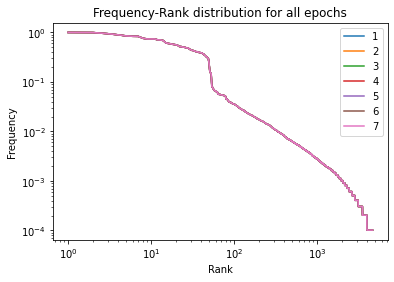

In [ ]:
nb = create_nature_basket(data)
fvalue = get_fitness_value(nb)
rec_size = 10
prim,kb,nb = create_initial_primordial_cuisine(nb,rec_size)
epochs = 7
prim, all_epochs_dict = apply_copy_mutate_algo(prim,kb,epochs,39774,nb,fvalue,'one')

fr_df = pd.DataFrame()

for k,v in all_epochs_dict.items():
  frdata = get_frequency_rank_for_one(v,k)
  fr_df = fr_df.append(frdata)
  #get_recipe_size_distribution_one(v,k)
#fr_df
fig, ax = plt.subplots()
for section, group in fr_df.groupby(['epochs']):
    group.plot(x='keys', y='values', ax=ax, label=section, loglog = True)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Frequency-Rank distribution for all epochs')
plt.show()

Frequency-rank plot for 6 epochs to show the plot variations

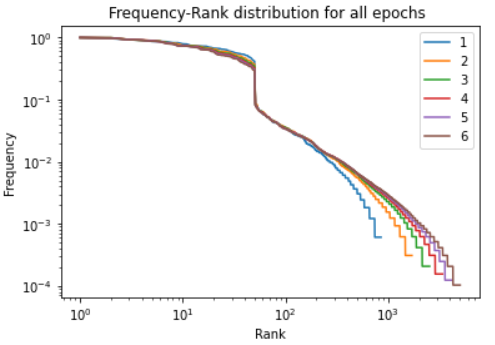

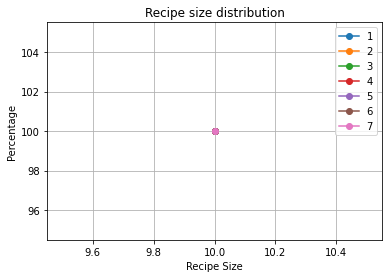

In [ ]:
rc_df = pd.DataFrame()

for k,v in all_epochs_dict.items():
  rcdata = get_recipe_size_distribution_one(v,k)
  rc_df = rc_df.append(rcdata)
  #get_recipe_size_distribution_one(v,k)
#fr_df
fig, ax = plt.subplots()
for section, group in rc_df.groupby(['epochs']):
    group.plot(x='keys', y='values', ax=ax, marker = 'o',label=section)

plt.xlabel('Recipe Size')
plt.ylabel('Percentage')
plt.title('Recipe size distribution') #for all epochs
plt.grid()
plt.show()

# **Answer to Q2**

Incorporating Ingredient Deletion and Addition into the above stated algorithm besides Ingredient Replacement as follows:

In [ ]:
def copy_mutate_modified(prim,kb,epochs,total_size,nb,fvalue,choose):

    recipe_per_ep = round(total_size/epochs)
    print('Recipes generated per epoch = ', recipe_per_ep)

    phi = (len(nb)+len(kb))/total_size

    for_all_epoch_once = {}

    for i in range(1,epochs+1):

        print('ratio = ' + str(len(kb)/len(prim)))
        
        while len(prim)<recipe_per_ep*i:
            
            delta = len(kb)/len(prim)
            
            if(delta>=phi):
                

                old_rec = list(random.choice(prim))
                prev_len = len(prim)
                pr = [0,1,2,2]         
                ch = random.choice(pr)

                while prev_len == len(prim):           
                    
                    if(ch==2):

                        rem = random.choice(old_rec)
                        new = random.choice(kb)

                        if fvalue[new]>fvalue[rem] and new not in old_rec:
                            old_rec.remove(rem)
                            old_rec.append(new)
                    
                    elif(ch==1):
                        
                        new = random.choice(kb)
                        old_rec.append(new)
                    
                    else:
                        
                        rem = random.choice(old_rec)
                        old_rec.remove(rem)                      
                  
                    if set(old_rec) not in prim:
                        prim.append(set(old_rec))

            else:
                    ni = random.choice(nb)
                    kb.append(ni)
                    nb.remove(ni)
                    
        print('Length of kitchen basket = ' + str(len(kb)) + ' after epoch ' + str(i))
        print('Length of primordial cuisine = ' + str(len(prim)) + ' after epoch ' + str(i))

        if choose == 'all':
          get_frequency_rank_plot(prim,i,choose)
          #plt.show()
          get_recipe_size_distribution(prim,i,choose)
          #plt.show()
        elif choose == 'one':
          for_all_epoch_once[i] = prim

    return prim, for_all_epoch_once


Size of Nature Basket =  6703
Number of Recipes =  39774
Number of Ingredients =  6703
Ratio of Number of Ingredients to Number of Recipes =  0.16852717855885754
Size of Kitchen Basket =  50
Primoridal cuisine of size 500 has been created
Recipes generated per epoch =  5682
ratio = 0.1
Length of kitchen basket = 958 after epoch 1
Length of primordial cuisine = 5682 after epoch 1
ratio = 0.16860260471664906
Length of kitchen basket = 1915 after epoch 2
Length of primordial cuisine = 11364 after epoch 2
ratio = 0.16851460753255895
Length of kitchen basket = 2873 after epoch 3
Length of primordial cuisine = 17046 after epoch 3
ratio = 0.16854393992725566
Length of kitchen basket = 3831 after epoch 4
Length of primordial cuisine = 22728 after epoch 4
ratio = 0.16855860612460402
Length of kitchen basket = 4788 after epoch 5
Length of primordial cuisine = 28410 after epoch 5
ratio = 0.16853220696937699
Length of kitchen basket = 5746 after epoch 6
Length of primordial cuisine = 34092 after e

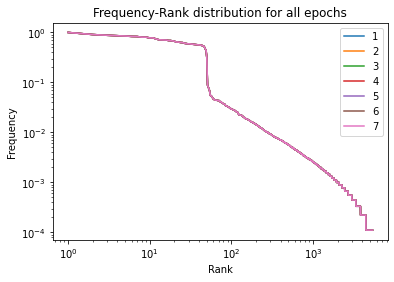

In [ ]:
nb = create_nature_basket(data)
get_data_info(data)
fvalue = get_fitness_value(nb)
rec_size = 10
prim,kb,nb = create_initial_primordial_cuisine(nb,rec_size)
epochs = 7
prim,cma_modified_epoch_one = copy_mutate_modified(prim,kb,epochs,39774,nb,fvalue,'one')
#print(cma_modified_epoch_one)

fr_newcma_df = pd.DataFrame()

for ki,vi in cma_modified_epoch_one.items():
  fr_data2 = get_frequency_rank_for_one(vi,ki)
  fr_newcma_df = fr_newcma_df.append(fr_data2)

fig, ax = plt.subplots()
for section, group in fr_newcma_df.groupby(['epochs']):
    group.plot(x='keys', y='values', ax=ax, label=section, loglog = True)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Frequency-Rank distribution for all epochs')
plt.show()

Recipe-size distribution for all epochs together in case of modified copy mutate algorithm

In [ ]:
nb = create_nature_basket(data)
get_data_info(data)
fvalue = get_fitness_value(nb)
rec_size = 10
prim,kb,nb = create_initial_primordial_cuisine(nb,rec_size)
epochs = 7
prim,cma_modified_epoch_one = copy_mutate_modified(prim,kb,epochs,39774,nb,fvalue,'one')

Size of Nature Basket =  6703
Number of Recipes =  39774
Number of Ingredients =  6703
Ratio of Number of Ingredients to Number of Recipes =  0.16852717855885754
Size of Kitchen Basket =  50
Primoridal cuisine of size 500 has been created
Recipes generated per epoch =  5682
ratio = 0.1
Length of kitchen basket = 958 after epoch 1
Length of primordial cuisine = 5682 after epoch 1
ratio = 0.16860260471664906
Length of kitchen basket = 1915 after epoch 2
Length of primordial cuisine = 11364 after epoch 2
ratio = 0.16851460753255895
Length of kitchen basket = 2873 after epoch 3
Length of primordial cuisine = 17046 after epoch 3
ratio = 0.16854393992725566
Length of kitchen basket = 3831 after epoch 4
Length of primordial cuisine = 22728 after epoch 4
ratio = 0.16855860612460402
Length of kitchen basket = 4788 after epoch 5
Length of primordial cuisine = 28410 after epoch 5
ratio = 0.16853220696937699
Length of kitchen basket = 5746 after epoch 6
Length of primordial cuisine = 34092 after e

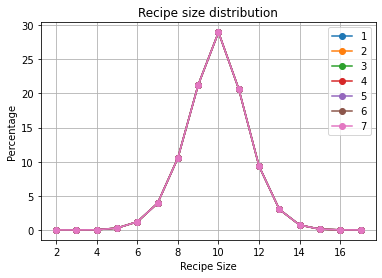

In [ ]:
rc_newcma_df = pd.DataFrame()

for ki,vi in cma_modified_epoch_one.items():
  rcdata = get_recipe_size_distribution_one(vi,ki)
  rc_newcma_df = rc_newcma_df.append(rcdata)
  #get_recipe_size_distribution_one(v,k)
#fr_df
fig, ax = plt.subplots()
for section, group in rc_newcma_df.groupby(['epochs']):
    group.plot(x='keys', y='values', ax=ax, marker = 'o',label=section)

plt.xlabel('Recipe Size')
plt.ylabel('Percentage')
plt.title('Recipe size distribution') #for all epochs
plt.grid()
plt.show()

For new Frequency_Rank Plot and Recipe Size Distribution plot for the modified algorithm based on each epoch:

Size of Kitchen Basket =  50
Primoridal cuisine of size 500 has been created
Feature-Length:  50


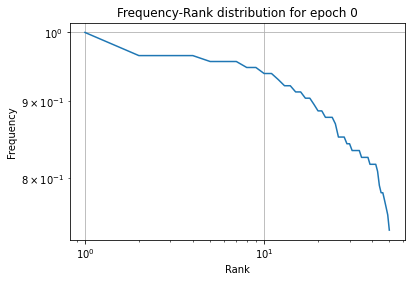

Recipes generated per epoch =  5682
ratio = 0.1
Length of kitchen basket = 821 after epoch 1
Length of primordial cuisine = 5682 after epoch 1
Feature-Length:  678


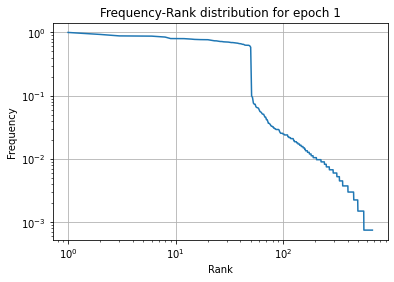

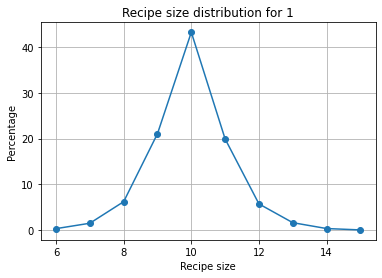

ratio = 0.14449137627595918
Length of kitchen basket = 1642 after epoch 2
Length of primordial cuisine = 11364 after epoch 2
Feature-Length:  1329


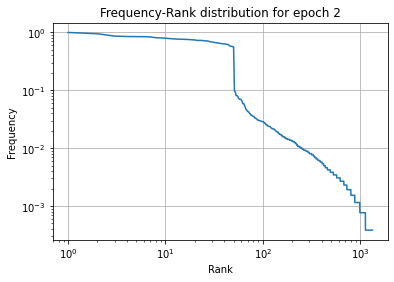

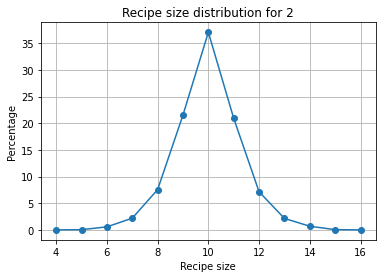

ratio = 0.14449137627595918
Length of kitchen basket = 2462 after epoch 3
Length of primordial cuisine = 17046 after epoch 3
Feature-Length:  1990


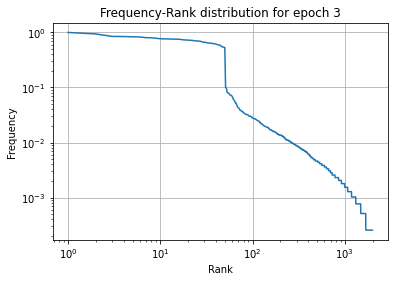

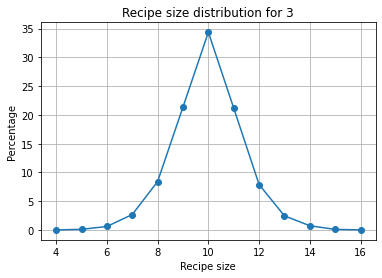

ratio = 0.14443271148656575
Length of kitchen basket = 3283 after epoch 4
Length of primordial cuisine = 22728 after epoch 4
Feature-Length:  2648


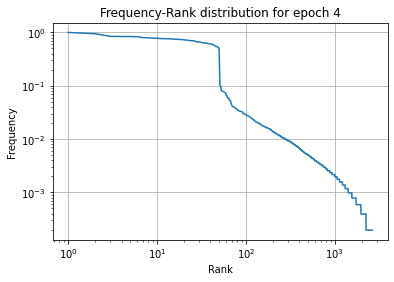

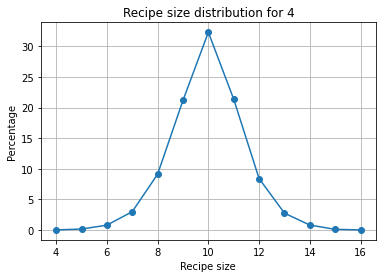

ratio = 0.1444473776839141
Length of kitchen basket = 4104 after epoch 5
Length of primordial cuisine = 28410 after epoch 5
Feature-Length:  3320


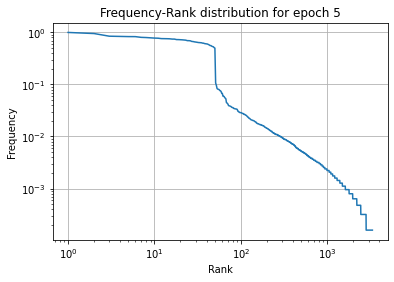

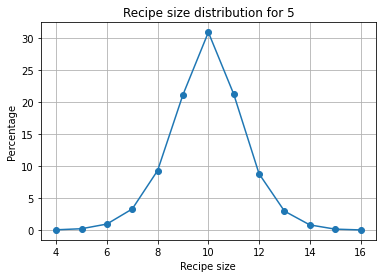

ratio = 0.14445617740232314
Length of kitchen basket = 4925 after epoch 6
Length of primordial cuisine = 34092 after epoch 6
Feature-Length:  4018


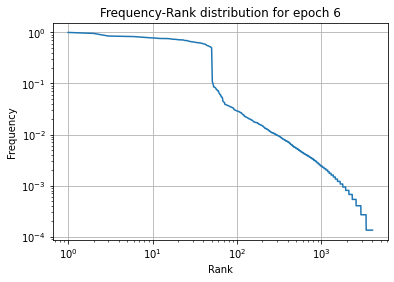

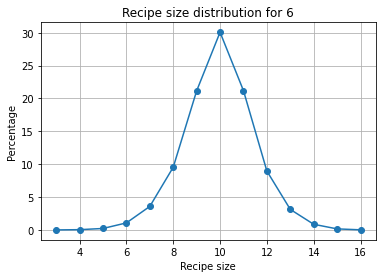

ratio = 0.14446204388126246
Length of kitchen basket = 5745 after epoch 7
Length of primordial cuisine = 39774 after epoch 7
Feature-Length:  4669


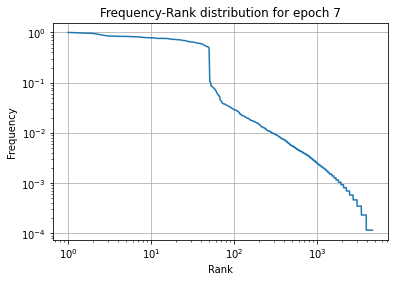

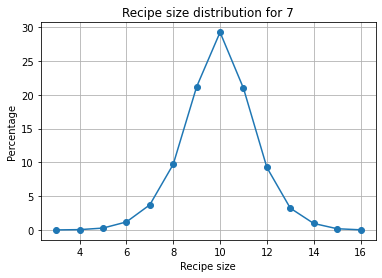

In [ ]:
rec_size = 10
prim,kb,nb = create_initial_primordial_cuisine(nb,rec_size)
get_frequency_rank_plot(prim,0,'all')
plt.show()
epochs = 7
prim, all_epochs_dict = copy_mutate_modified(prim,kb,epochs,39774,nb,fvalue,'all')

Complexity of both copy mutate algorithms:


**Time complexity:**<br>
Since it takes 'ratio' times each to form new recipes in the copy mutate algorithm (in both types - just ingredient replacement and also ingredient addition and deletion/removal), this is done till the recipes are formatted and ready for the next set of epochs.<br>
Here, Number of recipes in each epoch = Total number of recipes (prim) / epochs <br>
Number of recipes formed at each epoch = (ratio * prim) / epochs <br>
Here, ratio = len(kb)/len(prim)<br>
where,<br>
kb = size of kitchen basket <br>
prim = length of primordial cuisine (contains total number of cuisines)<br>
Therefore,<br>
Here the loop runs for = ratio * prim / epochs <br>
for each epoch <br>
Now, if 'e' is the number of epochs used in the algorithm, then,<br>
For e number of epochs, the entire algorithm would mainly run for ratio*prim times, which gives us the time compelxity of the algorithms.<br>
<br>

**Space complexity:** <br>
There might be differences in both the types of copy mutate algorithms such as:
*   In case of only replacement, there is no change in the number of ingredients being used for the recipe hence it does not affect much on the plot of recipe size distribution when it comes to each epoch or all epochs altogether.
*   In case where ingredient addition and deletion are also taken into account, the number of ingredient used in the recipes varied thus resulting in a different trend in the recipe size distribution curve plotted for the second type of copy mutate algorithm.



